<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [16]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [107]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [108]:
## Write your code here

df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
df['CodingActivities'] = df['CodingActivities'].fillna(
    df['CodingActivities'].mode()[0])
df['EdLevel'] = df['EdLevel'].fillna(df['EdLevel'].mode()[0])
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mean())
df['DevType'] = df['DevType'].fillna(df['DevType'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])


df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].mean())

#df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna(
    #df['LanguageHaveWorkedWith'].mode()[0])
df['JobSatPoints_1'] = df['JobSatPoints_1'].fillna(
    df['JobSatPoints_1'].mean())
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(
    df['ConvertedCompYearly'].mean())

for col in df.columns:
    print(col)
    print(f'{df[col].isna().sum()} / {(
        (df[col].isna().sum())/len(df))*100}% missing')

ResponseId
0 / 0.0% missing
MainBranch
0 / 0.0% missing
Age
0 / 0.0% missing
Employment
0 / 0.0% missing
RemoteWork
0 / 0.0% missing
Check
0 / 0.0% missing
CodingActivities
0 / 0.0% missing
EdLevel
0 / 0.0% missing
LearnCode
4949 / 7.5629995262619% missing
LearnCodeOnline
16200 / 24.756636153857908% missing
TechDoc
24540 / 37.50171921084402% missing
YearsCode
5568 / 8.508947537325978% missing
YearsCodePro
0 / 0.0% missing
DevType
0 / 0.0% missing
OrgSize
17957 / 27.44166144535966% missing
PurchaseInfluence
18031 / 27.554747314210616% missing
BuyNewTool
20256 / 30.954964316823812% missing
BuildvsBuy
22079 / 33.74084997784128% missing
TechEndorse
21769 / 33.267111878600794% missing
Country
0 / 0.0% missing
Currency
18753 / 28.65809862921589% missing
CompTotal
31697 / 48.43895655363174% missing
LanguageHaveWorkedWith
5692 / 8.698442777022173% missing
LanguageWantToWorkWith
9685 / 14.800495132723077% missing
LanguageAdmired
14565 / 22.258049727218545% missing
DatabaseHaveWorkedWith
15183 /

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


YCPExpRange
0-5      6.935041
5-10     6.935041
10-20    6.935041
20+      6.935041
Name: JobSat, dtype: float64


/tmp/ipykernel_301/2823072459.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_JobSat_Per_Range = df.groupby('YCPExpRange')['JobSat'].median()


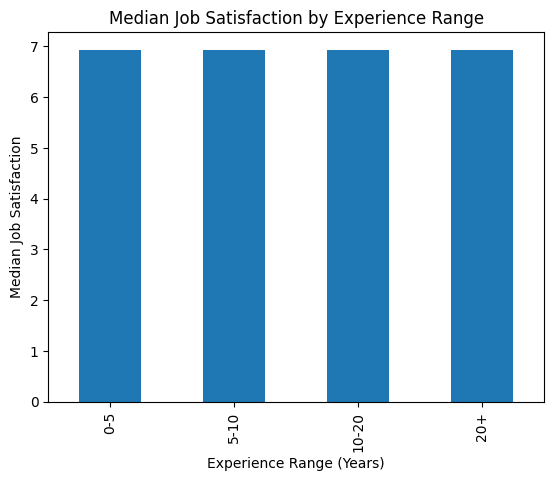

In [109]:
## Write your code here

bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '20+']

df['YCPExpRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

median_JobSat_Per_Range = df.groupby('YCPExpRange')['JobSat'].median()
print(median_JobSat_Per_Range)

median_JobSat_Per_Range.plot(kind='bar')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


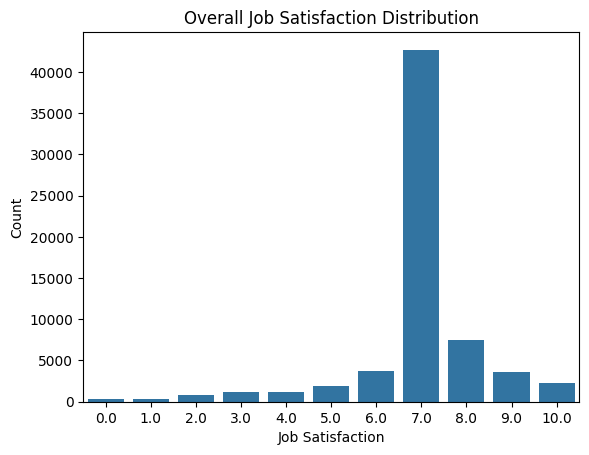

In [110]:
## Write your code here
df['JobSat'] = df['JobSat'].round().astype(float)
sns.countplot(x='JobSat', data=df)
plt.title('Overall Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


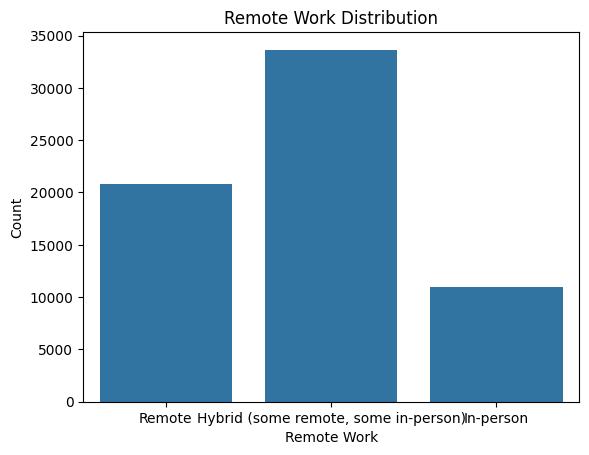

RemoteWork                                                            Hybrid (some remote, some in-person)  \
Employment                             DevType                                                               
Employed, full-time                    Academic researcher                                        0.562500   
                                       Blockchain                                                 0.175258   
                                       Cloud infrastructure engineer                              0.460251   
                                       Data engineer                                              0.513740   
                                       Data or business analyst                                   0.507123   
...                                                                                                    ...   
Student, part-time;Employed, part-time Student                                                    0.403509   
          

In [111]:
## Write your code here
sns.countplot(x='RemoteWork', data=df)
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

remote_by_role = pd.crosstab(
    [df['Employment'], df['DevType']],
    df['RemoteWork'],
    normalize='index'
)
print(remote_by_role)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


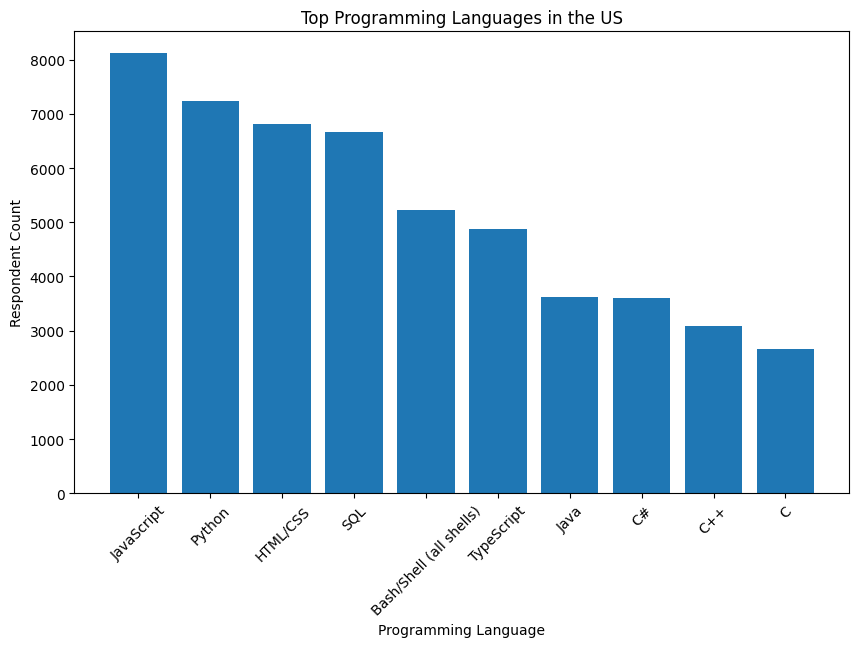

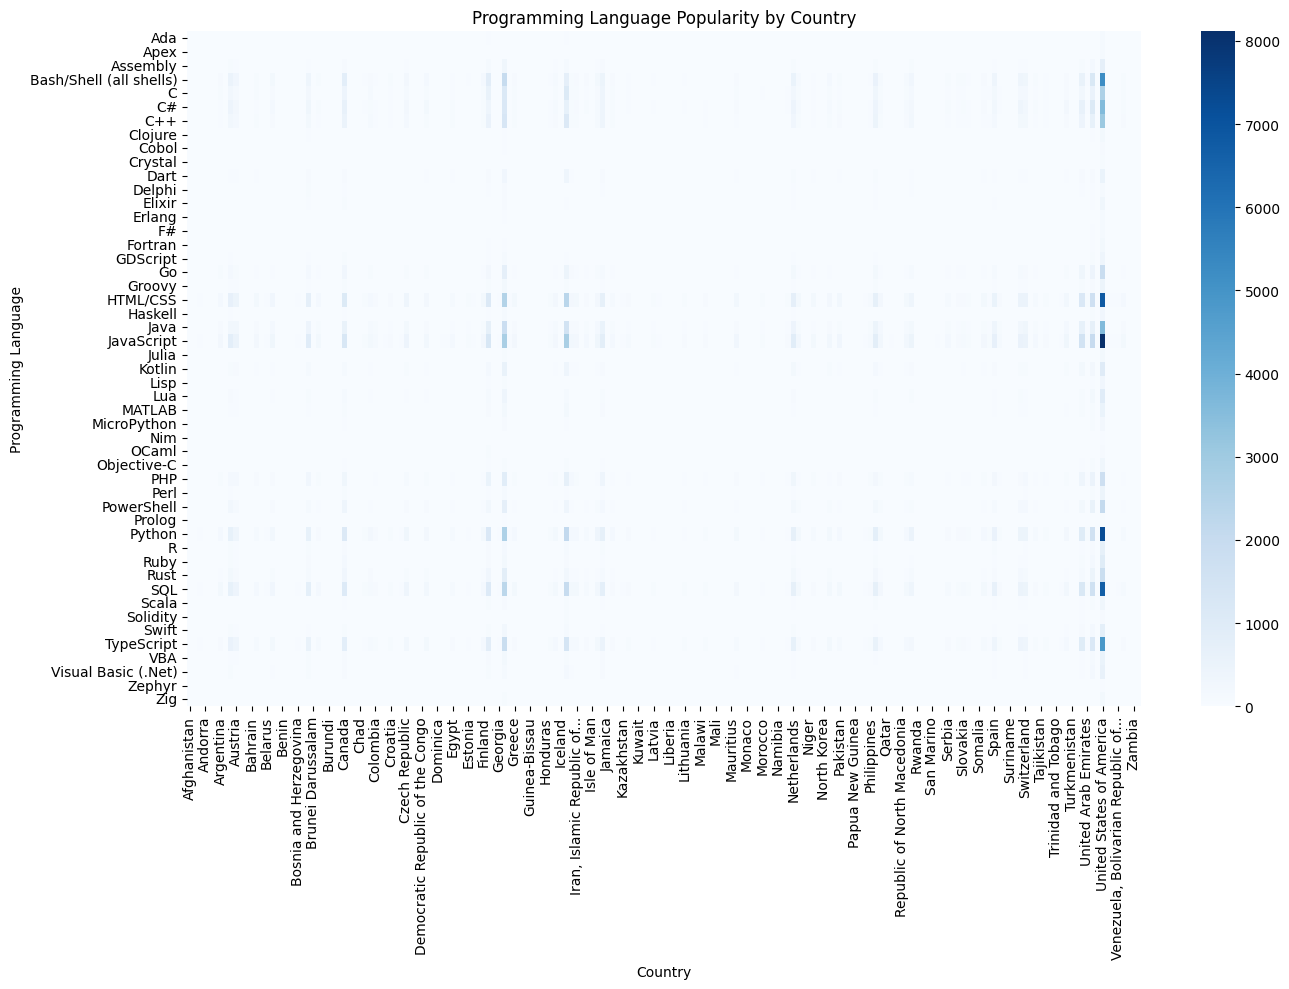

In [112]:
## Write your code here

# drop missing rows
df = df.dropna(subset=['LanguageHaveWorkedWith'])
# split languages into a list
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
# explode each language in its own row
df_languages = df.explode('LanguageHaveWorkedWith')
#strip extra white space
df_languages['LanguageHaveWorkedWith'] = df_languages['LanguageHaveWorkedWith'].str.strip()
# group LanguageHaveWorkedWith by Country and Count
lang_counts = (
    df_languages.groupby(['Country', 'LanguageHaveWorkedWith'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)
usa = lang_counts[lang_counts['Country'] == 'United States of America']

plt.figure(figsize=(10,6))
plt.bar(usa.head(10)['LanguageHaveWorkedWith'], usa.head(10)['Count'])
plt.xticks(rotation=45)
plt.title('Top Programming Languages in the US')
plt.xlabel('Programming Language')
plt.ylabel('Respondent Count')
plt.show()

#print(lang_counts)
#df['LanguageHaveWorkedWith'].value_counts().head()
#print(df['LanguageHaveWorkedWith'])
heatmap_data = lang_counts.pivot_table(
    index='LanguageHaveWorkedWith',
    columns='Country',
    values='Count',
    fill_value=0
)

plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data, cmap='Blues', annot=False)
plt.title('Programming Language Popularity by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


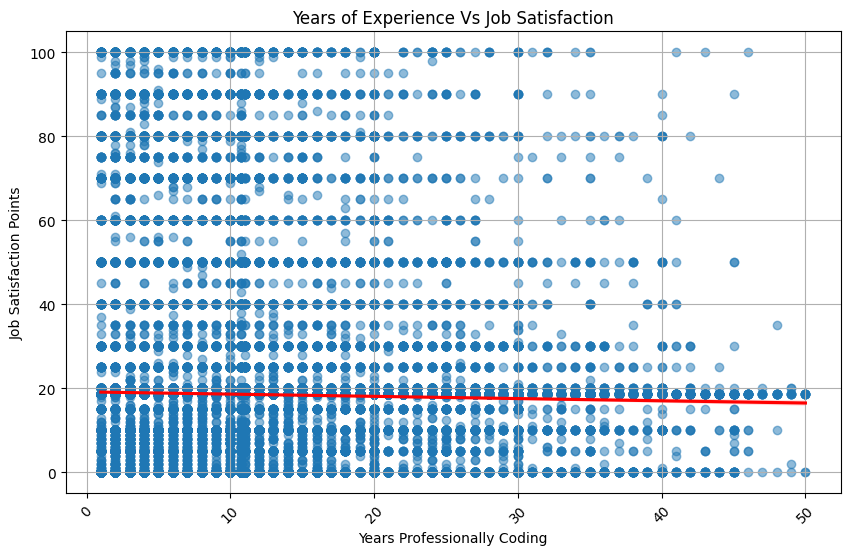

Correlation coefficient: -0.02


In [113]:
## Write your code here
#df[['YearsCodePro', 'JobSatPoints_1']].info()

# clean columns
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')
df_exp_sat = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# scatter plot
plt.figure(figsize=(10, 6))

sns.regplot(
    x='YearsCodePro',
    y='JobSatPoints_1',
    data=df_exp_sat,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)

plt.title('Years of Experience Vs Job Satisfaction')
plt.xlabel('Years Professionally Coding')
plt.xticks(rotation=45)
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()

# correlation coefficient
corr = df_exp_sat['YearsCodePro'].corr(df_exp_sat['JobSatPoints_1'])
print(f'Correlation coefficient: {corr:.2f}')

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment
Employed, full-time                                     int64
Employed, part-time                                     int64
I prefer not to say                                     int64
Independent contractor, freelancer, or self-employed    int64
Not employed, and not looking for work                  int64
Not employed, but looking for work                      int64
Retired                                                 int64
Student, full-time                                      int64
Student, part-time                                      int64
dtype: object


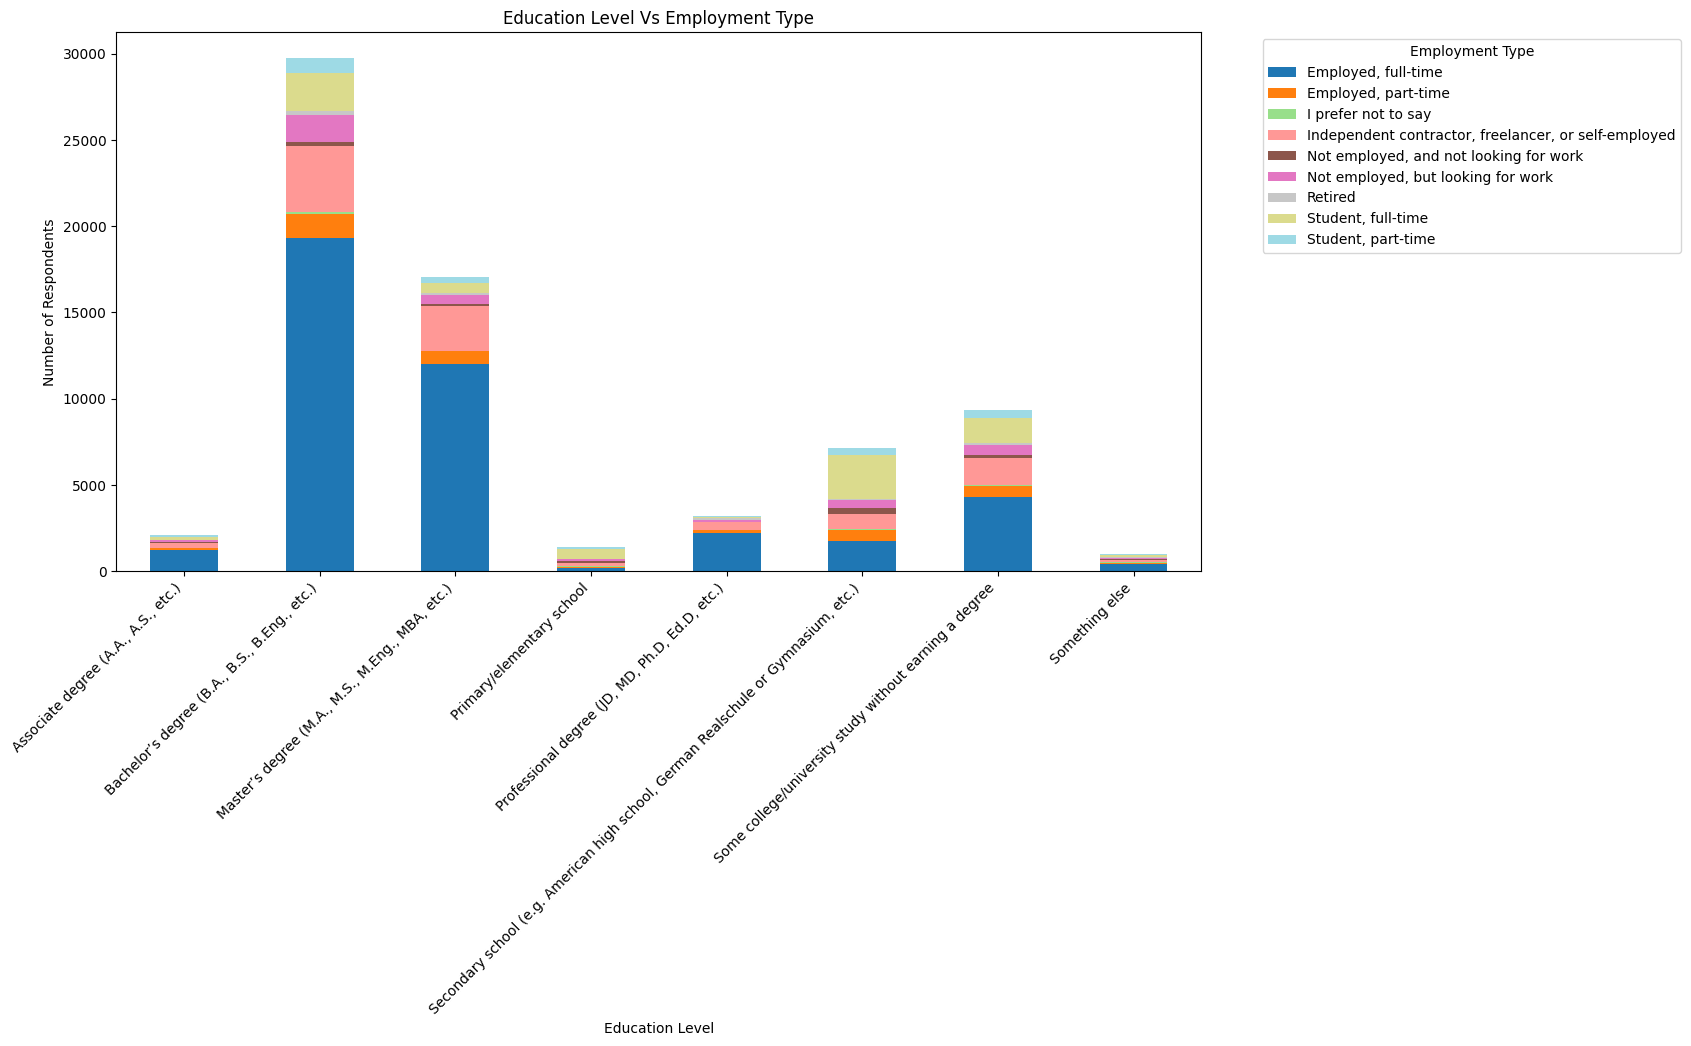

In [114]:
## Write your code here

# clean / explode employment data
df = df.dropna(subset=['Employment'])
df['Employment'] = df['Employment'].str.split(';')
df_emp = df.explode('Employment')
df_emp['Employment'] = df_emp['Employment'].str.strip()

ed_emp_ct_raw = pd.crosstab(df_emp['EdLevel'], df_emp['Employment'])
#print(ed_emp_ct_raw.head())
print(ed_emp_ct_raw.dtypes)
ed_emp_ct_raw.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7),
    colormap='tab20'
)
plt.title('Education Level Vs Employment Type')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#ed_emp_crosstab

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [116]:
## Write your code here
df.to_csv('cleaned_Data', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
